In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 1.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

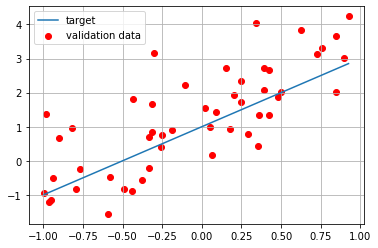

In [3]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm
import seaborn as sns

sns.set_theme(font_scale=1.7, style='whitegrid')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [10]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [19]:
sigma   = [0.2, 0.4, 0.6, 0.8, 1.0]
Nepochs = np.arange(10,210,20)
Ntrain  = np.arange(50, 2500, 500)


In [ ]:
#Per ora non si vedono i log di keras perché ho commentato e scommentato la cella
#Se li avessi lasciati ci sarebbero state 3000 righe inutili LOL

train_loss = np.zeros((5, 5))
test_loss  = np.zeros((5, 5))

for i in range(5):
    for j in range(5):
        x_train = np.random.uniform(-1, 1, Ntrain[i])
        x_valid = np.random.uniform(-1, 1, 50)
        x_valid.sort()
        y_target = m * x_valid + b 

        sig = 0.2*j
        
        y_train = np.random.normal(m * x_train + b, sig) 
        y_valid = np.random.normal(m * x_valid + b, sig)

        history = model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=30,
              shuffle=True, 
              validation_data=(x_valid, y_valid))
        
        train_loss[i][j] = history.history['mse'][29]
        test_loss[i][j]  = history.history['val_mse'][29]

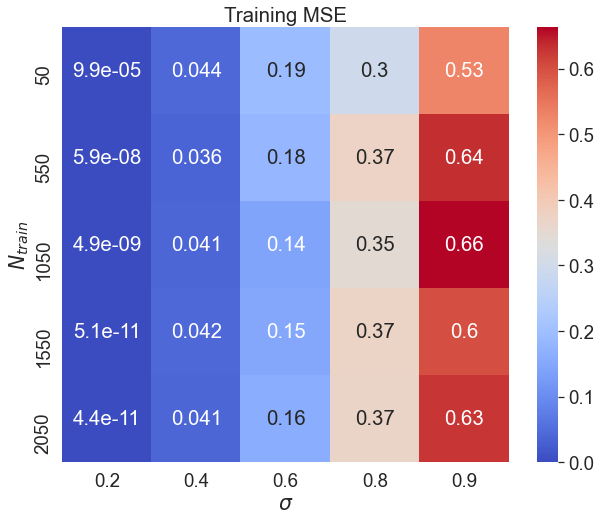

In [24]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(train_loss, annot=True, ax=ax, cmap="coolwarm", xticklabels=sigma, yticklabels=Ntrain)
ax.set_title("Training MSE")
ax.set_ylabel("$N_{train}$")
ax.set_xlabel("$\sigma$")
plt.show()

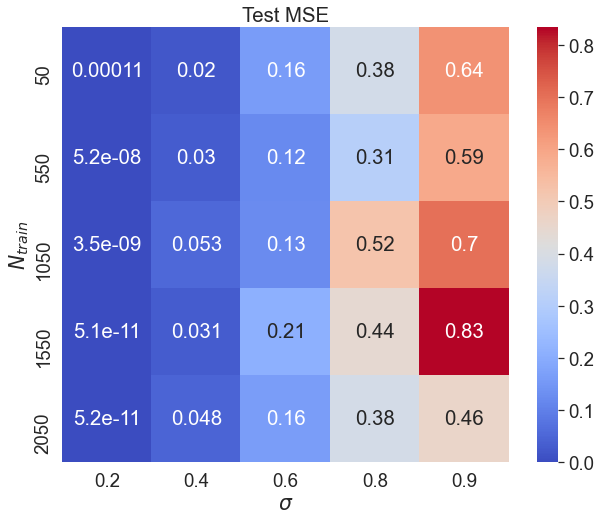

In [26]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(test_loss, annot=True, ax=ax, cmap="coolwarm", xticklabels=sigma, yticklabels=Ntrain)
ax.set_title("Test MSE")
ax.set_ylabel("$N_{train}$")
ax.set_xlabel("$\sigma$")
plt.show()

## Seconda parte

In [37]:
newmodel = tf.keras.Sequential()
newmodel.add(Dense(units=1, input_shape=[1], activation='linear'))
newmodel.add(Dense(units=64, activation='relu'))
newmodel.add(Dense(units=64, activation='relu'))
newmodel.add(Dense(units=1, activation='linear'))
newmodel.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [38]:
newmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 4,355
Trainable params: 4,355
Non-trainable params: 0
_________________________________________________________________


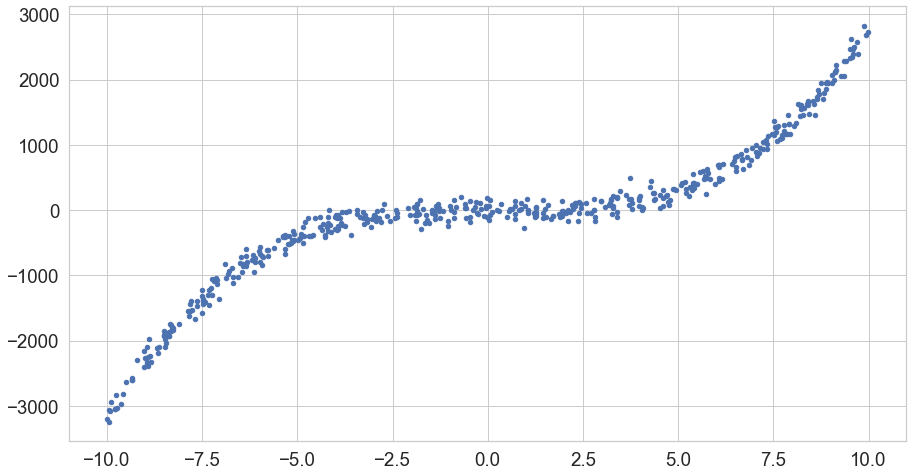

In [35]:
plt.figure(figsize=(15,8))
x_train = np.random.uniform(-10,10,500)
x_test  = np.random.uniform(-10,10,200)
x_test.sort()
y_target  = 4 - 3*x_test - 2*x_test**2 + 3*x_test**3

y_train = np.random.normal(4 - 3*x_train - 2*x_train**2 + 3*x_train**3, 100)
y_test  = np.random.normal(4 - 3*x_test  - 2*x_test**2  + 3*x_test**3, 100)

plt.scatter(x_train, y_train, s=20)

In [ ]:
#stesso discorso fatto per la cella del fit precedente

hist = newmodel.fit(x=x_train, y=y_train, 
              batch_size=50, epochs=500, 
              validation_data=(x_test, y_test))

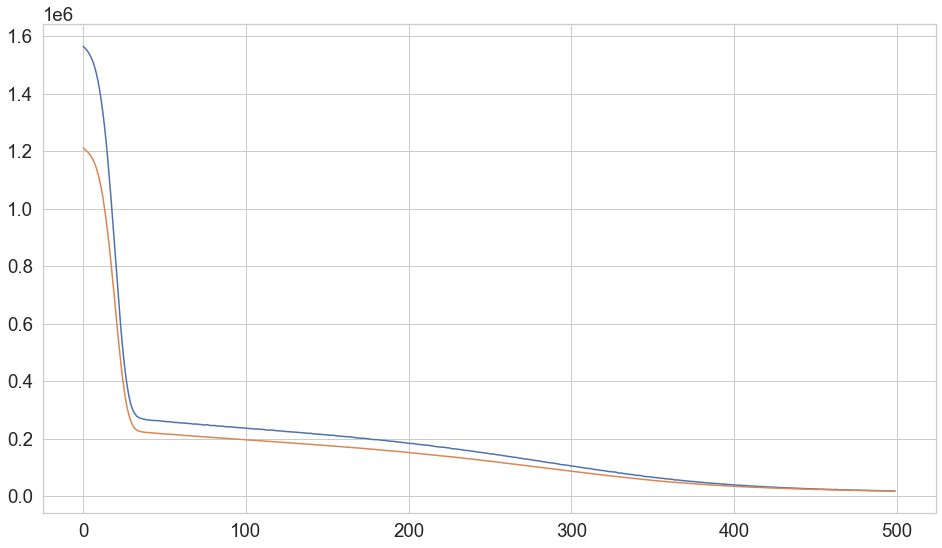

In [41]:
plt.figure(figsize=(16,9))
plt.title("Andamento delle funzioni di costo su set di training e di test/validazione")
plt.plot(hist.history['val_loss'], label='Campione di training')
plt.plot(hist.history['loss'], label='Campione di validazione')
plt.legend()
plt.show

### Genero dati del tutto nuovi in x

In [42]:
x_new = np.linspace(-10,10,100)
y_new = newmodel.predict(x_new)

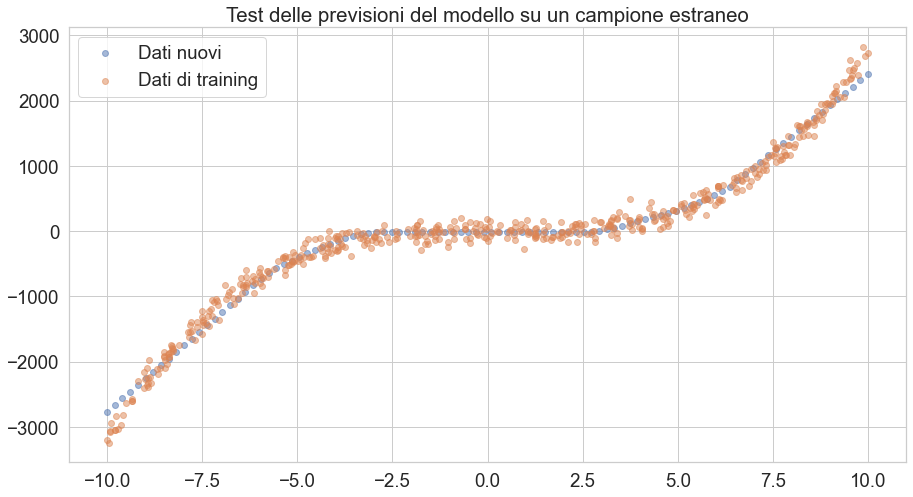

In [49]:
plt.figure(figsize=(15,8))
plt.title('Test delle previsioni del modello su un campione estraneo')
plt.scatter(x_new, y_new, alpha=0.5, label='Dati nuovi')
plt.scatter(x_train, y_train, alpha= 0.5, label='Dati di training')
plt.legend()
plt.show()